In [2]:
import cv2
import numpy as np
import torch
import os

In [3]:
def get_point_cloud(path):
    
    image = cv2.imread(path)
    print(image.shape)
    image = cv2.resize(image, (512, 512))
    
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 使用 Canny 边缘检测算法
    edges = cv2.Canny(gray_image, 100, 200)
    
    # 使用阈值分割
    ret, thresholded = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    # thresholded = cv2.resize(thresholded, (512, 512))
    
    black_pixels = np.argwhere(thresholded == 0)
    
#     if len(black_pixels) > 16000:
#         np.random.shuffle(black_pixels)
#         black_pixels = black_pixels[:16000]
        
    # point_cloud = np.concatenate((black_pixels, np.zeros((black_pixels.shape[0], 1))), axis=1)
    return black_pixels / 512 - 0.5

# target_point_cloud = torch.tensor(get_point_cloud('1.png')).unsqueeze(0).to('cuda').float()
# target_point_cloud.shape

In [3]:
directory = './'
png_files = [file for file in os.listdir(directory) if file.endswith('.png')]

In [4]:
png_files

['X.png',
 '3.png',
 '9.png',
 '5.png',
 'L.png',
 'B.png',
 '1.png',
 'K.png',
 'D.png',
 'C.png',
 '4.png',
 'Y.png',
 'A.png',
 'eccv.png',
 'E.png',
 '2.png']

In [5]:
# for png_file in png_files:
#     target_point_cloud = torch.tensor(get_point_cloud(png_file)).unsqueeze(0).float()
#     torch.save(target_point_cloud,png_file.replace('png','pt'))
#     print(target_point_cloud.shape)

torch.Size([1, 16000, 2])
torch.Size([1, 16000, 2])
torch.Size([1, 16000, 2])
torch.Size([1, 16000, 2])
torch.Size([1, 16000, 2])
torch.Size([1, 16000, 2])
torch.Size([1, 14668, 2])
torch.Size([1, 16000, 2])
torch.Size([1, 16000, 2])
torch.Size([1, 16000, 2])
torch.Size([1, 16000, 2])
torch.Size([1, 16000, 2])
torch.Size([1, 16000, 2])
torch.Size([1, 16000, 2])
torch.Size([1, 16000, 2])
torch.Size([1, 16000, 2])


(470, 1356, 3)
torch.Size([1, 33517, 2])


In [95]:
def get_point_cloud(path):
    
    image = cv2.imread(path)
#     print(image.shape)
#     image = cv2.resize(image, (512, 512))
    
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 使用 Canny 边缘检测算法
    edges = cv2.Canny(gray_image, 100, 200)
    
    # 使用阈值分割
    ret, thresholded = cv2.threshold(gray_image, 235,255, cv2.THRESH_BINARY)
    
    # thresholded = cv2.resize(thresholded, (512, 512))
    
    points = np.argwhere(thresholded == 0)
    center = np.mean(points, axis=0)
    
    
    points = (points - center) / np.max(np.abs(points - center)) * 0.5
    

#     if len(points) > 20000:
#         np.random.shuffle(points)
#         points = points[:20000]
        
    # point_cloud = np.concatenate((black_pixels, np.zeros((black_pixels.shape[0], 1))), axis=1)
    return torch.tensor(points)


In [105]:
png_file = 'dnn.png'
target_point_cloud = get_point_cloud(png_file).unsqueeze(0).float()
print(target_point_cloud.shape)
torch.save(target_point_cloud,png_file.replace('png','pt'))
print(target_point_cloud.shape)

torch.Size([1, 33312, 2])
torch.Size([1, 33312, 2])


load eccv.pt done!
(1, 33312, 2)


(-0.5, 0.5)

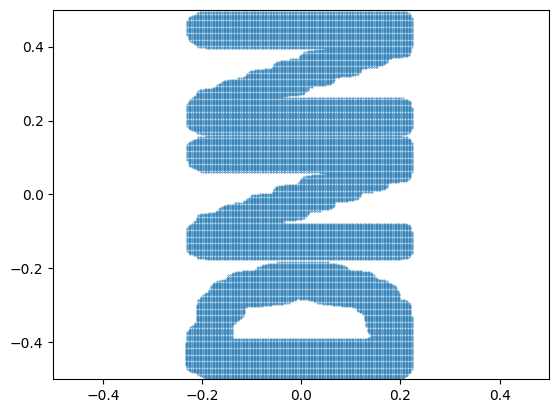

In [106]:
import matplotlib.pyplot as plt
ckpt = torch.load('dnn.pt')

print(f"load eccv.pt done!")

# import random
# point_cloud = random.choice(targets)

point_cloud = ckpt
points = np.asarray(point_cloud.cpu())
print(points.shape)

points = points
# 展示点云数据
plt.figure()
plt.scatter(points[:,:, 0], points[:,:, 1], s=0.1)  # 在xy平面上展示点云，颜色为蓝色，大小为1
# plt.axis('off')  # 关闭坐标轴
# plt.gca().set_aspect('equal', adjustable='box')  # 设置画布长宽比例为1:1
# 设置切割区域为正方形，宽度以y轴为准

ymin= -0.5
ymax = 0.5
center_x = 0
plt.ylim(ymin, ymax)  # 设置y轴范围
plt.xlim(center_x - (ymax - ymin) / 2, center_x + (ymax - ymin) / 2)


In [100]:
print(points.min(),points.max())

-0.47799098 0.5
